# Problem Set 4 - Random Numbers

**Table of contents**<a id='toc0_'></a>    
- 1. [RNG Warm-up (Reproducibility Basics)](#toc1_)    
- 2. [Simulate the chain and estimate steady state unemployment (2-States)](#toc2_)    
  - 2.1. [Single Worker](#toc2_1_)    
  - 2.2. [Many Workers](#toc2_2_)    
- 3. [Spell lengths: Simulation vs. Theory](#toc3_)    
  - 3.1. [Simulation-based Spells](#toc3_1_)    
  - 3.2. [Theoretical Spells](#toc3_2_)    
- 4. [From hazards to a 2×2 transition matrix](#toc4_)    
- 5. [Power iteration (compute the stationary distribution)](#toc5_)    
  - 5.1. [Implementing the function](#toc5_1_)    
  - 5.2. [Implementing the function \& comparison to closed form](#toc5_2_)    
- 6. [3-state extension](#toc6_)    
  - 6.1. [Simulate a 3-state path](#toc6_1_)    
  - 6.2. [Build the 3-state transition matrix and compute stationary unemployment](#toc6_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[RNG Warm-up (Reproducibility Basics)](#toc0_)

**Goal.** Create reproducible draws; understand *seed vs stream*.

- Create `rng = np.random.default_rng(2025)`.
- Draw 5 uniforms and 5 normals.
- Re-create the same sequence by constructing a **new** generator with the same seed.
- Show that **calling the same generator twice** advances the stream (different outputs).



In [1]:
import numpy as np

# Starter (safe to run)
rng = np.random.default_rng(2025)
u1 = rng.random(5)
z1 = rng.standard_normal(5)

rng_same = np.random.default_rng(2025)
# Task: Reproduce the first draws from the same seed
# u2 = ...
# z2 = ...

# Stream progression (same generator again)
u_next = rng.random(5)
z_next = rng.standard_normal(5)

In [2]:
import runpy # runs A1.py as a script
_ = runpy.run_module("A1", run_name="__main__")  # no big dict printed


u1: [0.99445781 0.38200974 0.82714801 0.83725528 0.97580901]
u2 (match u1): [0.99445781 0.38200974 0.82714801 0.83725528 0.97580901]
z1: [ 0.7653914  -0.75970935  0.26699619  0.70178085  0.29212132]
z2 (match z1): [ 0.7653914  -0.75970935  0.26699619  0.70178085  0.29212132]
u_next (different): [0.38954302 0.23021956 0.16696115 0.15343643 0.9740917 ]
z_next (different): [-0.3924407  -0.67731696  2.93601077 -0.66462723  1.25746344]


## 2. <a id='toc2_'></a>[Simulate the chain and estimate steady state unemployment (2-States)](#toc0_)

**Goal.** Simulate the two-state Markov chain with transition matrix
$$
P=\begin{pmatrix}1-s & s\\ f & 1-f\end{pmatrix},
$$
produce a path of states $x_t\in\{0,1\}$ with $0=\text{E}$, $1=\text{U}$, and use the simulated time average to estimate the steady state unemployment share. Compare it to the theoretical stationary value from Exercise 3, $\pi_U^*=\frac{s}{s+f}$.

**Intuition**?
 Think of each period, a worker is in one state (e.g., **Employed** `E` or **Unemployed** `U`).  
 - A **transition probability** tells you how likely it is to go from one state to another next period (e.g., `P(E→U)` is the job‑separation rate, `P(U→E)` is the job‑finding rate).  
 - Over time, repeatedly applying the transition matrix generates a **Markov chain**. Simulating with random numbers just means:  
   1) For each individual and period, draw a uniform number `u ~ U[0,1]`.  
   2) Compare `u` to the relevant row of the transition matrix to decide the next state.  


### 2.1. <a id='toc2_1_'></a>[Single Worker](#toc0_)

**Goal.** Simulate a single worker who is hit by random shocks each period:

If Employed ($E$), a bad shock causes separation to Unemployment ($U$) with probability $s$.

If Unemployed ($U$), a good shock leads to job finding back to $E$ with probability $f$.
No formulas—just randomness that switches states.

**Task: Implement the following:**

1. Pick inputs: horizon $T$, separation probability $s$, job-finding probability $f$, initial state $s_0 \in {0,1}$ (encode $0=E$, $1=U$), and a seed.

2. For each period $t=0,\dots,T-1$, draw one uniform $\epsilon_t \sim \mathrm{U}[0,1]$ and apply:

  - If in $E$: set next state to $U$ if $\epsilon_t < s$, else stay in $E$.
  - If in $U$: set next state to $E$ if $\epsilon_t < f$, else stay in $U$.

3. Store the whole path of length $T+1$ and report the share of time in $U$ (the mean, since $U=1$).


**Hints**  

- Use $0=E$, $1=U$ so averages give unemployment directly.
- One fresh random draw per worker per period.
- Start small ($T=20$, $N=5$) to print and check; then scale up.
- Set a seed for reproducibility while debugging.

In [3]:
import runpy # runs A1.py as a script
_ = runpy.run_module("A2_1", run_name="__main__")  # no big dict printed

First 10 shocks (uniforms): [0.625 0.897 0.776 0.225 0.3   0.874 0.005 0.821 0.797 0.468]
First 10 states (0=E,1=U): [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
Share of time in U (single worker): 0.052


### 2.2. <a id='toc2_2_'></a>[Many Workers](#toc0_)

- Next, simulate $N$ (e.g. 20,000) workers in parallel (one uniform per worker per period) and print the unemployment rate over time.

In [4]:
import runpy # runs A1.py as a script
_ = runpy.run_module("A2_2", run_name="__main__")  # no big dict printed

First 10 unemployment rates: [0.    0.019 0.033 0.042 0.049 0.054 0.055 0.057 0.059 0.059]
Last 10 unemployment rates : [0.064 0.063 0.064 0.065 0.061 0.06  0.06  0.06  0.061 0.061]
Overall unemployment rate : 0.06251498350164984


## 3. <a id='toc3_'></a>[Spell lengths: Simulation vs. Theory](#toc0_)

**Goal.** From a simulated path of states ($0=E$, $1=U$), measure how long unemployment and employment spells last. Think of a spell as a streak: consecutive $U$’s is one unemployment spell; consecutive $E$’s is one employment spell. Then compare your measured averages to what you’d expect if shocks hit with constant per-period chances:
- Unemployment spells end when a good shock arrives (probability $f$ per period).
- Employment spells end when a bad shock arrives (probability $s$ per period).
So the “typical” spell length should be about $1/f$ for $U$ and $1/s$ for $E$.

### 3.1. <a id='toc3_1_'></a>[Simulation-based Spells](#toc0_)

**Tasks.** 

1. Get a path: simulate a state path of length $T+1$ using your $s$ and $f$ (or reuse your earlier simulation for the many worker case). Encode $0=E$ and $1=U$.

2. Identify spells as streaks:
        - An unemployment spell is a run of 1’s (e.g., ... 0 1 1 1 0 ... has one $U$ spell of length 3).
        - An employment spell is a run of 0’s.
        - We ignore right-censored final spells (a trailing run that does not end within the sample).

3. Measure lengths: scan the path and record the length of each run of 1’s (for $U$) and each run of 0’s (for $E$).        


In [5]:
import runpy # runs A3_1.py as a script
_ = runpy.run_module("A3_1", run_name="__main__");  # no big dict printed


First 10 unemployment rates: [0.    0.019 0.033 0.042 0.049 0.054 0.055 0.057 0.059 0.059]
Last 10 unemployment rates : [0.064 0.063 0.064 0.065 0.061 0.06  0.06  0.06  0.061 0.061]
Overall unemployment rate : 0.06251498350164984
Pooled unemployment (T×N)  : 0.063
Unemployment spells: count=3,748,661, mean=3.335, theory~3.333
Employment   spells: count=3,749,878, mean=49.753, theory~50.000


### 3.2. <a id='toc3_2_'></a>[Theoretical Spells](#toc0_)

1. Compare your simulation based spells to the geometric predictions, i.e.
- Unemployment spell length is geometric with mean $\mathbb{E}[T_U]=1/f$.
- Employment spell length is geometric with mean $\mathbb{E}[T_E]=1/s$.

2. Plot histograms of $U$- and $E$-spell lengths and overlay the geometric pmf with parameters $f$ and $s$.

Pooled unemployment (T×N)  : 0.063
Unemployment spells: count=3,748,661, mean=3.335, theory~3.333
Employment   spells: count=3,749,878, mean=49.753, theory~50.000
Unemployment spells (U=1): count=3,748,661
  Sample mean length   : 3.335
  Theoretical 1/f      : 3.333

Employment spells (E=0): count=3,749,878
  Sample mean length   : 49.753
  Theoretical 1/s      : 50.000


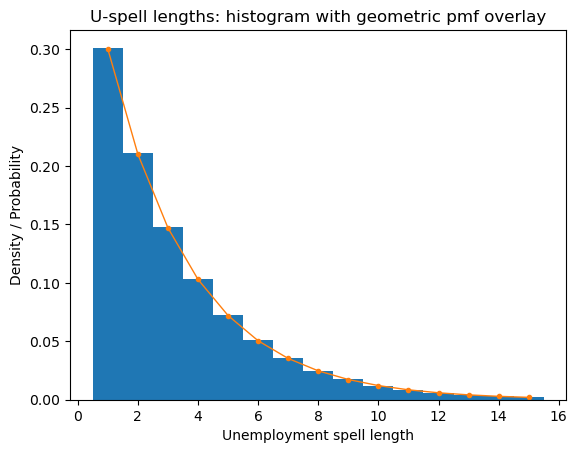

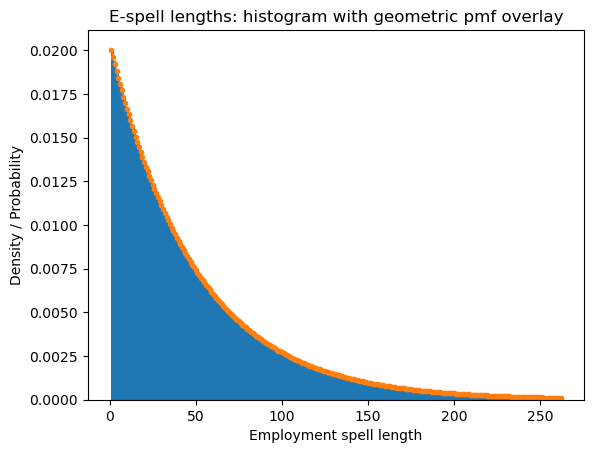

In [6]:
import runpy # 
_ = runpy.run_module("A3_2", run_name="__main__");  # no big dict printed

**Interpretation.** Discuss briefly the economic intuition of what you have computed and what the plots show.

## 4. <a id='toc4_'></a>[From hazards to a 2×2 transition matrix](#toc0_)

Let $s\in(0,1)$ be the probability to lose one's job (separation probability - transition from E to U) and $f\in(0,1)$ the job-finding probability (transition from U to E):
$$
P = \begin{pmatrix}
1-s & s\\\\
f & 1-f
\end{pmatrix}.
$$

**Matrix Interpretation**  
- States: `E=0` (employed), `U=1` (unemployed).  
- Rows = current state, columns = next state.  
  - From `E`: stay employed with prob `1−s`, move to `U` with prob `s`.  
  - From `U`: find a job with prob `f`, stay unemployed with prob `1−f`.  
- $P$ is **row-stochastic**: each row sums to 1 and all entries are in $[0,1]$.

**Your tasks**  
1. Implement `make_P_2state(s, f)` returning the matrix above.  
2. Validate that entries are in $[0,1]$ and each row sums to 1.


In [7]:
def make_P_2state(s, f):
    """Return a 2x2 row-stochastic transition matrix for E=0, U=1.
    """
    assert 0.0 <= s <= 1.0 and 0.0 <= f <= 1.0, "Probabilities must be in [0,1]."
    # TODO: implement
    P = np.array([[1.0, 0.0],
                  [0.0, 1.0]], dtype=float)

    return P

# Validator will be defined in solution; checks follow there.


In [8]:
import runpy # 
_ = runpy.run_module("A4", run_name="__main__");  # no big dict printed

## 5. <a id='toc5_'></a>[Power iteration (compute the stationary distribution)](#toc0_)

**Idea.** Think of $\mu^{(t)}$ as the share of people in each state at time $t$.
If everyone follows the same transition rules $P$, then next period’s shares are
$$
\mu^{(t+1)} \;=\; \mu^{(t)} P
$$
If you keep applying this update, the shares typically settle down to a fixed vector $\pi$ that doesn’t change when you multiply by $P$. That $\pi$ is the stationary distribution.


### 5.1. <a id='toc5_1_'></a>[Implementing the function](#toc0_)

**Task.** 

- Implement a function `stationary_power(P, tol=1e-12, maxit=1_000_000, mu0=None)` that returns `(mu, iters)` where:
  - `P` is an $n\times n$ **row-stochastic** matrix (each row sums to 1, entries in $[0,1]$).
  - `mu0` is an optional initial distribution $\mu^{(0)}$ (shape `(n,)`); if `None`, use the uniform vector.
  - Start from any probability vector $\mu^{(0)}$ (e.g., uniform).
  - Repeatedly update $\mu \leftarrow \mu P$.
  - Stop when $|\mu^{(t+1)}-\mu^{(t)}|_\infty < \texttt{tol}$ (the biggest absolute change in any entry is small).
  - Return the final $\mu$ (renormalized to sum to 1) and how many iterations it took.


In [9]:
import runpy # 
_ = runpy.run_module("A5_1", run_name="__main__");  # no big dict printed

### 5.2. <a id='toc5_2_'></a>[Implementing the function \& comparison to closed form](#toc0_)

**Task.** 

1. **Apply the function.** Use your function `stationary_power(P, tol, maxit, mu0)` to obtain
   $$
   (\pi,\ \texttt{iters}), \qquad \pi=(\pi_E,\pi_U), \quad \pi=\pi P,\quad \pi_E+\pi_U=1.
   $$
   Report \(\pi_U\) (the stationary unemployment rate) and the iteration count.

2. **Closed-form benchmark.** Compute the theoretical steady state implied by the hazards:
   $$
   \pi_U^{\text{cf}}=\frac{s}{s+f}
   $$

3. **Compare.** Verify numerically that
   $$
   \bigl|\pi_U - \pi_U^{\text{cf}}\bigr| \;<\; 10^{-10}
   $$


In [10]:
import runpy # 
_ = runpy.run_module("A5_2", run_name="__main__");  # no big dict printed

Transition matrix P:
[[0.98 0.02]
 [0.3  0.7 ]]

Stationary distribution (power iteration): pi_E=0.937499999998, pi_U=0.062500000002
Iterations used: 68

Closed-form unemployment: pi_U_cf = s/(s+f) = 0.062500000000
Absolute difference      : |pi_U - pi_U_cf| = 1.785e-12


## 6. <a id='toc6_'></a>[3-state extension](#toc0_)

**Setup.** States are encoded as **`E=0`** (employed), **`U=1`** (short-term unemployed), **`L=2`** (long-term unemployed).

### 6.1. <a id='toc6_1_'></a>[Simulate a 3-state path](#toc0_)

**Goal.** Simulate a panel of workers over time where each worker gets one random shock per period and moves according to the current row of a $3\times3$ transition matrix.

**Inputs.**
Horizon $T$, workers $N$, probabilities per period $s$ ($E\!\to\!U$), $f_s$ ($U\!\to\!E$), $\ell$ ($U\!\to\!L$), $f_\ell$ ($L\!\to\!E$), and initial states. Require $s,f_s,\ell,f_\ell\in[0,1]$ and $f_s+\ell\le1$. 

**Use the following parameter values for your simulation:**
- T   = 10_000   # horizon
- N   = 20_000   # number of workers
- s   = 0.02     # E -> U separation probability
- f_s = 0.30     # U -> E job-finding probability
- ell = 0.10     # U -> L progression probability
- f_l = 0.20     # L -> E job-finding probability

**Dynamics (each period, each worker).**
- If in $E$: with prob $s$ go to $U$, else stay $E$.
- If in $U$: with prob $f_s$ go to $E$; else if $u<f_s+\ell$ go to $L$; else stay $U$.
- If in $L$: with prob $f_\ell$ go to $E$, else stay $L$.

**Task.**
1) Extend the function `simulate_many_workers_shocks` from above to `simulate_many_workers_shocks_3state`.
2) Build `states` of shape $(T+1,N)$ with entries in $\{0,1,2\}$ and set `states[0,:]`.
3) Print the first and last 10 unemployment rates; the time-average; and the pooled unemployment (T $\times$ N).

**Hints.**
- Use cumulative thresholds: for $U$, compare $u$ to $f_s$ and $f_s+\ell$.
- Vectorize with boolean masks for current $E/U/L$; or start with simple loops.
- Set a seed for reproducibility.


In [15]:
import runpy # 
_ = runpy.run_module("A6_1", run_name="__main__");  # no big dict printed

First 10 unemployment rates: [0.    0.019 0.033 0.042 0.05  0.055 0.056 0.06  0.062 0.063]
Last 10 unemployment rates : [0.071 0.069 0.072 0.073 0.069 0.067 0.067 0.067 0.068 0.069]
Time-avg unemployment      : 0.070
Pooled unemployment (T×N)  : 0.070


### 6.2. <a id='toc6_2_'></a>[Build the 3-state transition matrix and compute stationary unemployment](#toc0_)

**1) Construct $P$ (rows = current state, cols = next state).**
$$
P \equiv
\begin{bmatrix}
1-s & s & 0 \\
f_s & 1-f_s-\ell & \ell \\
f_\ell & 0 & 1-f_\ell
\end{bmatrix}
$$
Check: each row sums to $1$ and entries are in $[0,1]$.

**2) Compute the stationary distribution $\pi=(\pi_0,\pi_1,\pi_2)$.**
Interpretation: $\pi_0=\Pr(E)$, $\pi_1=\Pr(U)$, $\pi_2=\Pr(L)$ in the long run.
- start $\pi^{(0)}$, iterate $\pi^{(t+1)}=\pi^{(t)}P$ until convergence.

**3) Compute the steady state unemployment rate.**
$$ 
u^\ast = \pi_1 + \pi_2 \quad\text{(steady state share in $U$ or $L$).}
$$ 


In [12]:
import runpy # 
_ = runpy.run_module("A6_2", run_name="__main__");  # no big dict printed

Transition matrix P:
 [[0.98 0.02 0.  ]
 [0.3  0.6  0.1 ]
 [0.2  0.   0.8 ]]
Stationary distribution pi (E, U, L): [0.930233 0.046512 0.023256]
Steady-state unemployment u* (= pi_U + pi_L): 0.069767
Converged in iterations: 129
